# Analysis of smart meter data from London

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
energyHHDf = pd.read_csv('../dataset-smart-meter-in-london/archive/hhblock_dataset/hhblock_dataset/block_0.csv')
energyHHDf.head()

,LCLid,day,hh_0,hh_1,hh_2,hh_3,hh_4,hh_5,hh_6,hh_7,...,hh_38,hh_39,hh_40,hh_41,hh_42,hh_43,hh_44,hh_45,hh_46,hh_47
0,MAC000002,2012-10-13,0.263,0.269,0.275,0.256,0.211,0.136,0.161,0.119,...,0.918,0.278,0.267,0.239,0.230,0.233,0.235,0.188,0.259,0.250
1,MAC000002,2012-10-14,0.262,0.166,0.226,0.088,0.126,0.082,0.123,0.083,...,1.075,0.956,0.821,0.745,0.712,0.511,0.231,0.210,0.278,0.159
2,MAC000002,2012-10-15,0.192,0.097,0.141,0.083,0.132,0.070,0.130,0.074,...,1.164,0.249,0.225,0.258,0.260,0.334,0.299,0.236,0.241,0.237
3,MAC000002,2012-10-16,0.237,0.237,0.193,0.118,0.098,0.107,0.094,0.109,...,0.966,0.172,0.192,0.228,0.203,0.211,0.188,0.213,0.157,0.202
4,MAC000002,2012-10-17,0.157,0.211,0.155,0.169,0.101,0.117,0.084,0.118,...,0.223,0.075,0.230,0.208,0.265,0.377,0.327,0.277,0.288,0.256


<AxesSubplot:>

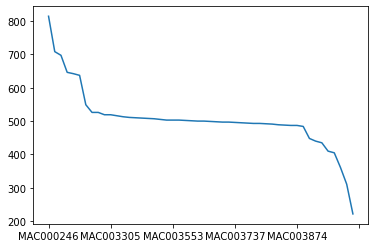

In [3]:
energyHHDf['LCLid'].value_counts().plot()

The dataset has different date entries for different household ID. So not all IDs have the same tiemstamp periods, so will need further filtering if comparing data with weather patterns for those days. 
However, the data frame should be ok to use if trying to find consumption patterns, as we welcome as much entries as they are availalbe. 

In [4]:
energyHHDf.head()

,LCLid,day,hh_0,hh_1,hh_2,hh_3,hh_4,hh_5,hh_6,hh_7,...,hh_38,hh_39,hh_40,hh_41,hh_42,hh_43,hh_44,hh_45,hh_46,hh_47
0,MAC000002,2012-10-13,0.263,0.269,0.275,0.256,0.211,0.136,0.161,0.119,...,0.918,0.278,0.267,0.239,0.230,0.233,0.235,0.188,0.259,0.250
1,MAC000002,2012-10-14,0.262,0.166,0.226,0.088,0.126,0.082,0.123,0.083,...,1.075,0.956,0.821,0.745,0.712,0.511,0.231,0.210,0.278,0.159
2,MAC000002,2012-10-15,0.192,0.097,0.141,0.083,0.132,0.070,0.130,0.074,...,1.164,0.249,0.225,0.258,0.260,0.334,0.299,0.236,0.241,0.237
3,MAC000002,2012-10-16,0.237,0.237,0.193,0.118,0.098,0.107,0.094,0.109,...,0.966,0.172,0.192,0.228,0.203,0.211,0.188,0.213,0.157,0.202
4,MAC000002,2012-10-17,0.157,0.211,0.155,0.169,0.101,0.117,0.084,0.118,...,0.223,0.075,0.230,0.208,0.265,0.377,0.327,0.277,0.288,0.256


# Exploratory Data Analysis

In [5]:
# grab a single user for now
firstUser = energyHHDf[energyHHDf['LCLid'] == 'MAC000002']

<AxesSubplot:>

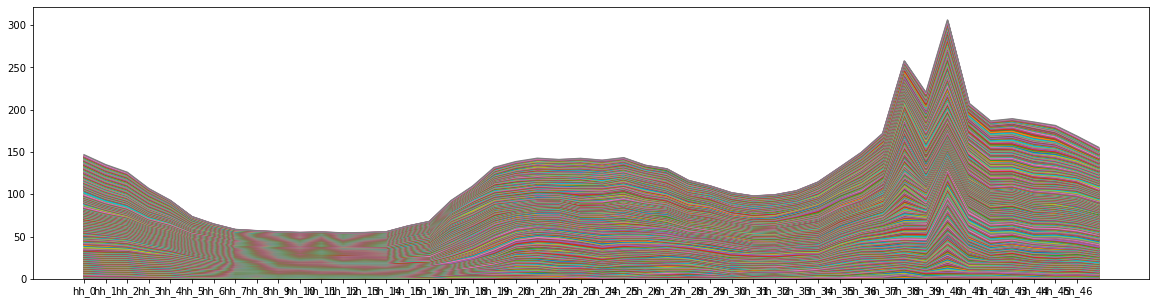

In [6]:
# plot timeseries of all date stamps for the first user
firstUser.transpose()[2:].plot(legend=False, figsize=(20,5), kind='area', xticks=range(0,47))

It's interesting that the quietest time is around 2 am onwards as it would be in the middle of the night. 
Let's check other users.

<AxesSubplot:>

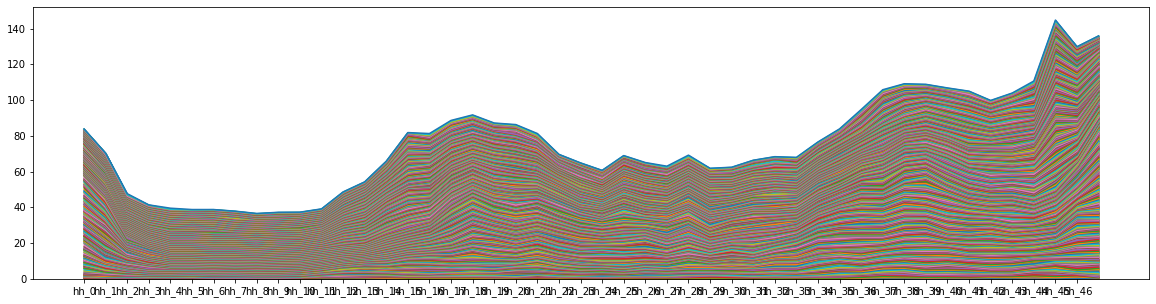

In [7]:
# plot timeseries of all date stamps for the another user
energyHHDf[energyHHDf['LCLid'] == 'MAC003718'].transpose()[2:].plot(legend=False, figsize=(20,5), kind='area', xticks=range(0,47))

<AxesSubplot:>

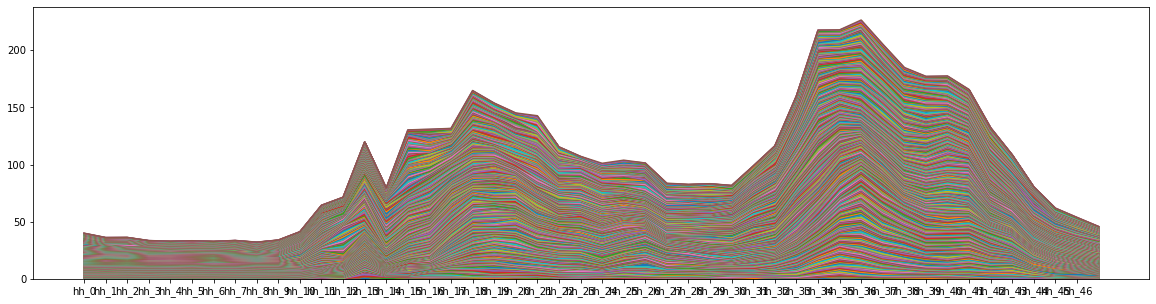

In [8]:
# plot timeseries of all date stamps for the another user
energyHHDf[energyHHDf['LCLid'] == 'MAC003737'].transpose()[2:].plot(legend=False, figsize=(20,5), kind='area', xticks=range(0,47))

Low energy consumption time varries from user to user depending on their lifestyle, but generally quiet in mid-night/early morning.

Let's concentrate on finding patterns within a single consumer for now. 

In [9]:
firstUser.head()

,LCLid,day,hh_0,hh_1,hh_2,hh_3,hh_4,hh_5,hh_6,hh_7,...,hh_38,hh_39,hh_40,hh_41,hh_42,hh_43,hh_44,hh_45,hh_46,hh_47
0,MAC000002,2012-10-13,0.263,0.269,0.275,0.256,0.211,0.136,0.161,0.119,...,0.918,0.278,0.267,0.239,0.230,0.233,0.235,0.188,0.259,0.250
1,MAC000002,2012-10-14,0.262,0.166,0.226,0.088,0.126,0.082,0.123,0.083,...,1.075,0.956,0.821,0.745,0.712,0.511,0.231,0.210,0.278,0.159
2,MAC000002,2012-10-15,0.192,0.097,0.141,0.083,0.132,0.070,0.130,0.074,...,1.164,0.249,0.225,0.258,0.260,0.334,0.299,0.236,0.241,0.237
3,MAC000002,2012-10-16,0.237,0.237,0.193,0.118,0.098,0.107,0.094,0.109,...,0.966,0.172,0.192,0.228,0.203,0.211,0.188,0.213,0.157,0.202
4,MAC000002,2012-10-17,0.157,0.211,0.155,0.169,0.101,0.117,0.084,0.118,...,0.223,0.075,0.230,0.208,0.265,0.377,0.327,0.277,0.288,0.256


### Data cleaning

In [10]:
# find how many nan values are there in dataframe 
firstUser.isna().sum().sum()


1

In [11]:
# replace na value with 0 and check again
firstUser.fillna(0, inplace=True)
firstUser.isna().sum().sum()

/Users/franciscatan/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:5176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


0

### Correlation analysis for the first user

In [12]:
datebytimeDf = firstUser.iloc[:, 2:]
datebytimeDf.head()

,hh_0,hh_1,hh_2,hh_3,hh_4,hh_5,hh_6,hh_7,hh_8,hh_9,...,hh_38,hh_39,hh_40,hh_41,hh_42,hh_43,hh_44,hh_45,hh_46,hh_47
0,0.263,0.269,0.275,0.256,0.211,0.136,0.161,0.119,0.167,0.109,...,0.918,0.278,0.267,0.239,0.230,0.233,0.235,0.188,0.259,0.250
1,0.262,0.166,0.226,0.088,0.126,0.082,0.123,0.083,0.120,0.079,...,1.075,0.956,0.821,0.745,0.712,0.511,0.231,0.210,0.278,0.159
2,0.192,0.097,0.141,0.083,0.132,0.070,0.130,0.074,0.124,0.078,...,1.164,0.249,0.225,0.258,0.260,0.334,0.299,0.236,0.241,0.237
3,0.237,0.237,0.193,0.118,0.098,0.107,0.094,0.109,0.091,0.105,...,0.966,0.172,0.192,0.228,0.203,0.211,0.188,0.213,0.157,0.202
4,0.157,0.211,0.155,0.169,0.101,0.117,0.084,0.118,0.080,0.119,...,0.223,0.075,0.230,0.208,0.265,0.377,0.327,0.277,0.288,0.256


<AxesSubplot:>

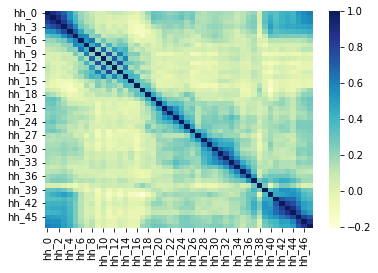

In [13]:
# compute correlation between hours - how similar are half hours to one another?
sns.heatmap(datebytimeDf.astype(float).corr(), cmap="YlGnBu")

Correlation map is as expected, with high correlation with midnight/late night/early morning as usage at this time tend to be lower compared to the rest of the day. 

<AxesSubplot:>

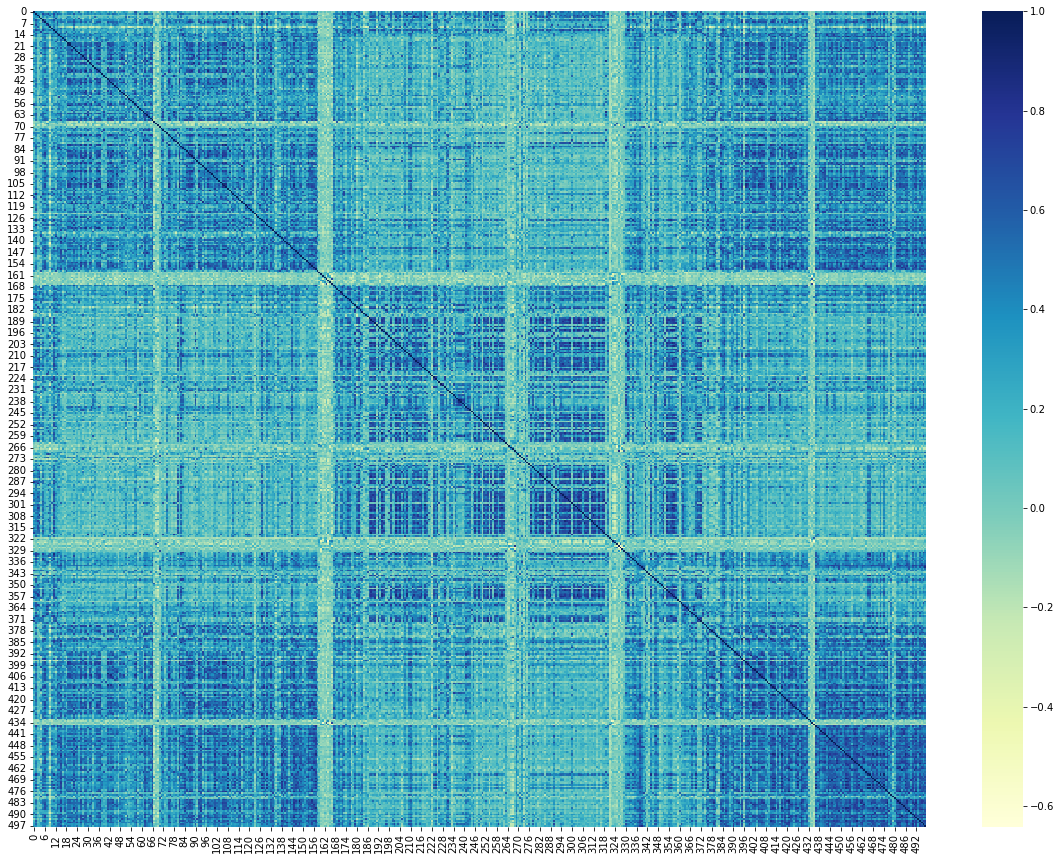

In [14]:
# compute correlation between days - how similar are days to one another?

timebyDateDf = datebytimeDf.transpose()
figure = plt.figure(figsize=(20,15))
sns.heatmap(timebyDateDf.astype(float).corr(), cmap="YlGnBu")

In [15]:
#retrive dates
firstUser.iloc[65:70]['day']

65    2012-12-21
66    2012-12-22
67    2012-12-23
68    2012-12-24
69    2012-12-25
Name: day, dtype: object

Let's take a look at the energy consumption time seres for some of those dates where there is negative correlation

In [16]:
daynames = list(firstUser.iloc[65:70]['day'])
daynames

['2012-12-21', '2012-12-22', '2012-12-23', '2012-12-24', '2012-12-25']

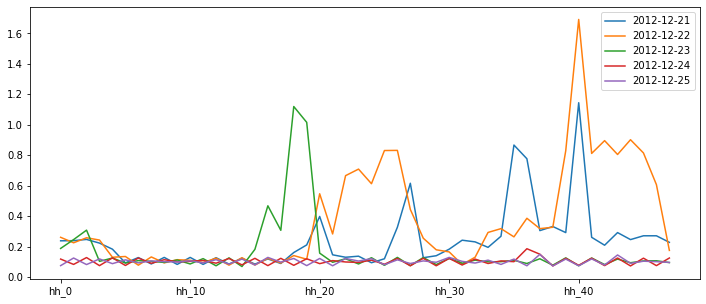

In [17]:
datebytimeDf.iloc[65:70,:].transpose().plot(figsize=(12,5))
plt.legend(labels=daynames)

Looks like it gets pretty quiet during Christmas even and Christmas days, that explains the negative correlation, which is expected.

# Find clusters of energy consumptions for the first user

In [18]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import mean_squared_error

In [19]:
data = datebytimeDf.astype('float64')
data.head()

,hh_0,hh_1,hh_2,hh_3,hh_4,hh_5,hh_6,hh_7,hh_8,hh_9,...,hh_38,hh_39,hh_40,hh_41,hh_42,hh_43,hh_44,hh_45,hh_46,hh_47
0,0.263,0.269,0.275,0.256,0.211,0.136,0.161,0.119,0.167,0.109,...,0.918,0.278,0.267,0.239,0.230,0.233,0.235,0.188,0.259,0.250
1,0.262,0.166,0.226,0.088,0.126,0.082,0.123,0.083,0.120,0.079,...,1.075,0.956,0.821,0.745,0.712,0.511,0.231,0.210,0.278,0.159
2,0.192,0.097,0.141,0.083,0.132,0.070,0.130,0.074,0.124,0.078,...,1.164,0.249,0.225,0.258,0.260,0.334,0.299,0.236,0.241,0.237
3,0.237,0.237,0.193,0.118,0.098,0.107,0.094,0.109,0.091,0.105,...,0.966,0.172,0.192,0.228,0.203,0.211,0.188,0.213,0.157,0.202
4,0.157,0.211,0.155,0.169,0.101,0.117,0.084,0.118,0.080,0.119,...,0.223,0.075,0.230,0.208,0.265,0.377,0.327,0.277,0.288,0.256


In [20]:
# perform scaling
scaler = MinMaxScaler()
energyScaled = scaler.fit_transform(data)

In [21]:
len(energyScaled)

498

In [22]:
# find optimum k

nrange = range(2,30+1)
kmeansModel = [KMeans(n_clusters=i) for i in nrange]
kmeansModel


# for k in range(2,50):
#     print(k)
#     kmeansModel = KMeans(n_clusters=k, verbose=0)
#     kmeansModel.fit_transform(energyScaled)
#     score = silhouette_score(energyScaled, kmeansModel.labels_)
#     scoreList.append(score)

[KMeans(n_clusters=2),
 KMeans(n_clusters=3),
 KMeans(n_clusters=4),
 KMeans(n_clusters=5),
 KMeans(n_clusters=6),
 KMeans(n_clusters=7),
 KMeans(),
 KMeans(n_clusters=9),
 KMeans(n_clusters=10),
 KMeans(n_clusters=11),
 KMeans(n_clusters=12),
 KMeans(n_clusters=13),
 KMeans(n_clusters=14),
 KMeans(n_clusters=15),
 KMeans(n_clusters=16),
 KMeans(n_clusters=17),
 KMeans(n_clusters=18),
 KMeans(n_clusters=19),
 KMeans(n_clusters=20),
 KMeans(n_clusters=21),
 KMeans(n_clusters=22),
 KMeans(n_clusters=23),
 KMeans(n_clusters=24),
 KMeans(n_clusters=25),
 KMeans(n_clusters=26),
 KMeans(n_clusters=27),
 KMeans(n_clusters=28),
 KMeans(n_clusters=29),
 KMeans(n_clusters=30)]

In [23]:
score = [kmeansModel[i].fit(data).score(data) for i in range(len(kmeansModel))]


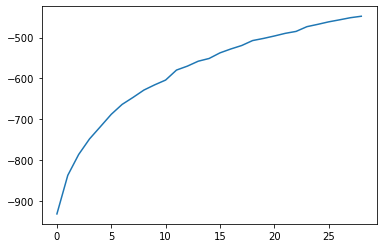

In [24]:
plt.plot(score)

The score is the negative of the K-means objective. 

In [25]:
silhouetteScore = [silhouette_score(energyScaled, kmeansModel[i].labels_) for i in range(len(kmeansModel))]


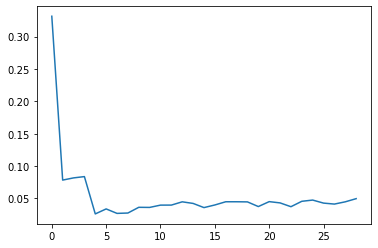

In [26]:
plt.plot(silhouetteScore)


What we're seeing here is no clear elbow point, also a silhoutte score that drastically drops after k=2.
Typically happens with high-dimensional data, so it's worth exploring other methods like PCA to reduce dimensionality or other methods. 

For now, let's explore k=2. 

In [27]:
firstUser.head()

,LCLid,day,hh_0,hh_1,hh_2,hh_3,hh_4,hh_5,hh_6,hh_7,...,hh_38,hh_39,hh_40,hh_41,hh_42,hh_43,hh_44,hh_45,hh_46,hh_47
0,MAC000002,2012-10-13,0.263,0.269,0.275,0.256,0.211,0.136,0.161,0.119,...,0.918,0.278,0.267,0.239,0.230,0.233,0.235,0.188,0.259,0.250
1,MAC000002,2012-10-14,0.262,0.166,0.226,0.088,0.126,0.082,0.123,0.083,...,1.075,0.956,0.821,0.745,0.712,0.511,0.231,0.210,0.278,0.159
2,MAC000002,2012-10-15,0.192,0.097,0.141,0.083,0.132,0.070,0.130,0.074,...,1.164,0.249,0.225,0.258,0.260,0.334,0.299,0.236,0.241,0.237
3,MAC000002,2012-10-16,0.237,0.237,0.193,0.118,0.098,0.107,0.094,0.109,...,0.966,0.172,0.192,0.228,0.203,0.211,0.188,0.213,0.157,0.202
4,MAC000002,2012-10-17,0.157,0.211,0.155,0.169,0.101,0.117,0.084,0.118,...,0.223,0.075,0.230,0.208,0.265,0.377,0.327,0.277,0.288,0.256


In [28]:
# Rerun kmeans for chosen k
kmeans = KMeans(n_clusters=2, max_iter=600, algorithm='auto')
kmeans.fit(energyScaled)


KMeans(max_iter=600, n_clusters=2)

In [29]:
firstUser['cluster'] = kmeans.labels_
firstUser.head()

/var/folders/gh/cyykbpd16fj4_f_f7h8m48f00000gn/T/ipykernel_24691/3347623064.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  firstUser['cluster'] = kmeans.labels_


,LCLid,day,hh_0,hh_1,hh_2,hh_3,hh_4,hh_5,hh_6,hh_7,...,hh_39,hh_40,hh_41,hh_42,hh_43,hh_44,hh_45,hh_46,hh_47,cluster
0,MAC000002,2012-10-13,0.263,0.269,0.275,0.256,0.211,0.136,0.161,0.119,...,0.278,0.267,0.239,0.230,0.233,0.235,0.188,0.259,0.250,0
1,MAC000002,2012-10-14,0.262,0.166,0.226,0.088,0.126,0.082,0.123,0.083,...,0.956,0.821,0.745,0.712,0.511,0.231,0.210,0.278,0.159,0
2,MAC000002,2012-10-15,0.192,0.097,0.141,0.083,0.132,0.070,0.130,0.074,...,0.249,0.225,0.258,0.260,0.334,0.299,0.236,0.241,0.237,0
3,MAC000002,2012-10-16,0.237,0.237,0.193,0.118,0.098,0.107,0.094,0.109,...,0.172,0.192,0.228,0.203,0.211,0.188,0.213,0.157,0.202,0
4,MAC000002,2012-10-17,0.157,0.211,0.155,0.169,0.101,0.117,0.084,0.118,...,0.075,0.230,0.208,0.265,0.377,0.327,0.277,0.288,0.256,0


In [30]:
firstUser['day'] = pd.to_datetime(firstUser['day'])

/var/folders/gh/cyykbpd16fj4_f_f7h8m48f00000gn/T/ipykernel_24691/3581423564.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  firstUser['day'] = pd.to_datetime(firstUser['day'])


In [31]:
firstUser['dayname'] = firstUser['day'].apply(lambda x: x.day_name())

/var/folders/gh/cyykbpd16fj4_f_f7h8m48f00000gn/T/ipykernel_24691/190716918.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  firstUser['dayname'] = firstUser['day'].apply(lambda x: x.day_name())


In [32]:
firstUser['month'] = firstUser['day'].apply(lambda x: x.month)

/var/folders/gh/cyykbpd16fj4_f_f7h8m48f00000gn/T/ipykernel_24691/2449572919.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  firstUser['month'] = firstUser['day'].apply(lambda x: x.month)


In [33]:
firstUser.head()

,LCLid,day,hh_0,hh_1,hh_2,hh_3,hh_4,hh_5,hh_6,hh_7,...,hh_41,hh_42,hh_43,hh_44,hh_45,hh_46,hh_47,cluster,dayname,month
0,MAC000002,2012-10-13,0.263,0.269,0.275,0.256,0.211,0.136,0.161,0.119,...,0.239,0.230,0.233,0.235,0.188,0.259,0.250,0,Saturday,10
1,MAC000002,2012-10-14,0.262,0.166,0.226,0.088,0.126,0.082,0.123,0.083,...,0.745,0.712,0.511,0.231,0.210,0.278,0.159,0,Sunday,10
2,MAC000002,2012-10-15,0.192,0.097,0.141,0.083,0.132,0.070,0.130,0.074,...,0.258,0.260,0.334,0.299,0.236,0.241,0.237,0,Monday,10
3,MAC000002,2012-10-16,0.237,0.237,0.193,0.118,0.098,0.107,0.094,0.109,...,0.228,0.203,0.211,0.188,0.213,0.157,0.202,0,Tuesday,10
4,MAC000002,2012-10-17,0.157,0.211,0.155,0.169,0.101,0.117,0.084,0.118,...,0.208,0.265,0.377,0.327,0.277,0.288,0.256,0,Wednesday,10


In [34]:
cluster_zero = firstUser[firstUser['cluster']==0]
len(cluster_zero)

371

In [35]:
cluster_one = firstUser[firstUser['cluster']==1]
len(cluster_one)

127

In [36]:
cluster_two = firstUser[firstUser['cluster']==2]
len(cluster_two)

0

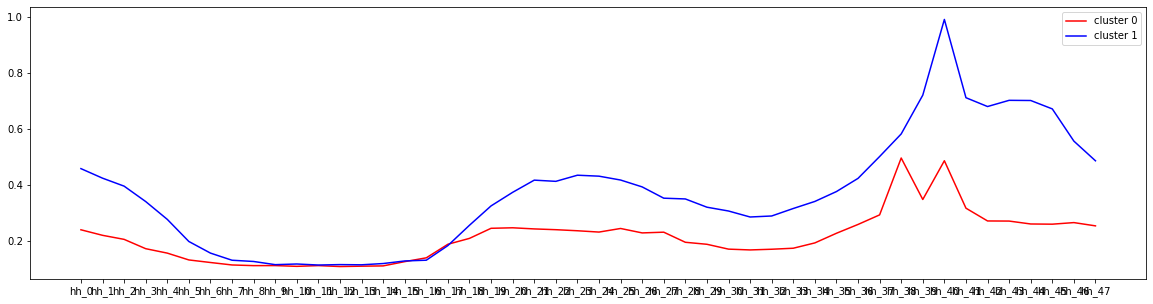

In [44]:
# plot the mean consumption across dates according to the cluster label
plt.figure(figsize=(20,5))
plt.plot(cluster_zero.iloc[:,2:-3].mean(axis=0), 'r', \
    cluster_one.iloc[:,2:-3].mean(axis=0), 'b', \
    cluster_two.iloc[:,2:-3].mean(axis=0), 'g',    )
plt.legend(labels=['cluster 0', 'cluster 1'])
plt.show()

Let's pull out the day and months for each cluster.

Text(0.5, 1.0, 'cluster one')

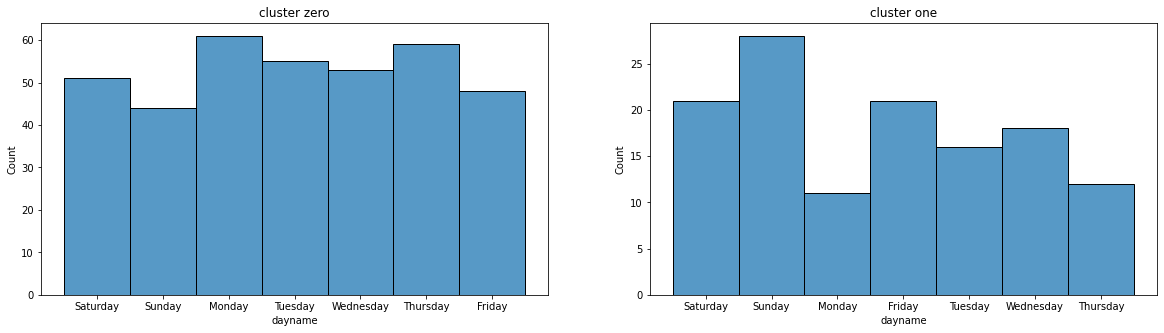

In [42]:
fig, axes = plt.subplots(1,2, figsize=(20,5))
sns.histplot(ax=axes[0], data=cluster_zero['dayname'])
axes[0].set_title('cluster zero')
sns.histplot(ax=axes[1], data=cluster_one['dayname'])
axes[1].set_title('cluster one')
# sns.histplot(ax=axes[2], data=cluster_two['dayname'])
# axes[2].set_title('cluster two')

Text(0.5, 1.0, 'cluster one')

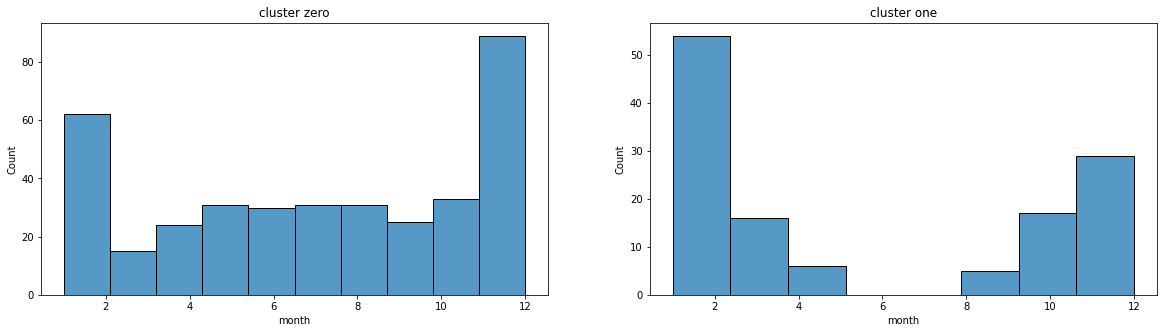

In [43]:
fig, axes = plt.subplots(1,2, figsize=(20,5))
sns.histplot(ax=axes[0], data=cluster_zero['month'])
axes[0].set_title('cluster zero')
sns.histplot(ax=axes[1], data=cluster_one['month'])
axes[1].set_title('cluster one')
# sns.histplot(ax=axes[2], data=cluster_two['month'])
# axes[2].set_title('cluster two')

# Summary

Seems like the k-means clustering is picking up some pattern in usage according to seasons. Cluster 1 shows higher average usage and the month distribution from cluster 1 coincides with winter months.

What's next??
- explore other clustering methods for half-ourly time series
- hierarchical clustering? or for example, based on the correlation maps, split the data down and analyse patterns from it.
- compare with energy rates and find optimisation/redistribution
- running component analysis on time series, are we able to infer types of usage (but hard to do with half-hourly data?)
- try using APIs for big data to speed up analyses
